In [ ]:
# let us install kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# This block is used for uploading the api key associated with my account
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [ ]:
# This block shows some of the datasets
# it is just proving that the api key worked
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           6941        214  1.0              
kaggleashwin/population-dataset                                World Population by Countries Dataset (1960-2021)    69KB  2022-08-31 05:30:26           1733         74  1.0              
iamsouravbanerjee/house-rent-prediction-dataset                House Rent Prediction Dataset                        82KB  2022-08-20 13:49:03          12710        321  1.0              
pantanjali/unemployment-dataset                                Un

In [ ]:
#Download the dataset you need
!kaggle datasets download -d raihansikdar/dhakahomepricedataset

  0% 0.00/271 [00:00<?, ?B/s]
100% 271/271 [00:00<00:00, 272kB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
#Extracting the dataset contents
zipFilePath='/content/dhakahomepricedataset.zip'
zipFileObj=ZipFile(file=zipFilePath)
zipFileObj.extractall('/tmp/dataset')

In [ ]:
! pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np

In [ ]:
import pandas as pd
df = pd.read_csv('/tmp/dataset/Dhaka_homeprices_dataset.csv')

In [ ]:
df

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000
5,5000,71000
6,2500,40000
7,2700,38000
8,1200,17000
9,5000,100000


In [ ]:
df.head()

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000


In [ ]:
df.shape # no. of rows and columns

(10, 2)

In [ ]:
df.isnull().sum() # finds the no. of nulls in each column , 0 means no nulls

area     0
price    0
dtype: int64

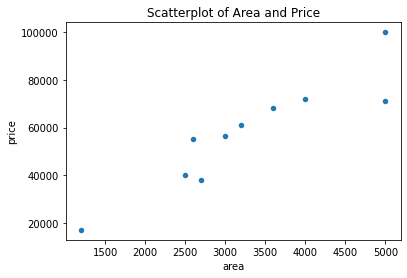

In [ ]:
# plot a graph of regression
df.plot.scatter(x='area',y='price',title='Scatterplot of Area and Price')

In [ ]:
# prints the correlation matrix
print(df.corr())

           area     price
area   1.000000  0.921676
price  0.921676  1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


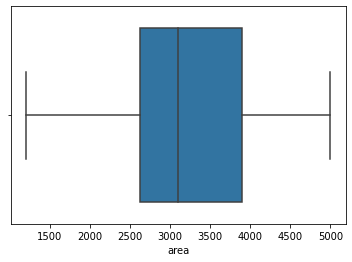

In [ ]:
# For detecting outliers
import seaborn as sns
sns.boxplot(df['area'])  

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['area'])) # finds the z-score
print(z)

0    0.611744
1    0.251895
2    0.071970
3    0.287880
4    0.647729
5    1.547353
6    0.701707
7    0.521782
8    1.871218
9    1.547353
Name: area, dtype: float64


In [ ]:
y=df['price'].values.reshape(-1,1)
x=df['area'].values.reshape(-1,1)

In [ ]:
x

array([[2600],
       [3000],
       [3200],
       [3600],
       [4000],
       [5000],
       [2500],
       [2700],
       [1200],
       [5000]])

In [ ]:
y

array([[ 55000],
       [ 56500],
       [ 61000],
       [ 68000],
       [ 72000],
       [ 71000],
       [ 40000],
       [ 38000],
       [ 17000],
       [100000]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) # splits into train and test data

In [ ]:
x_train

array([[5000],
       [5000],
       [4000],
       [1200],
       [3000],
       [3600],
       [2500],
       [2700]])

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [ ]:
regressor.fit(x_train,y_train)  # fits/trains the model

NameError: ignored

In [ ]:
y_pred=regressor.predict(x_test)  # gives the predicted result

In [ ]:
df_preds=pd.DataFrame({'Actual':y_test.squeeze(),'Predicted':y_pred.squeeze()})
print(df_preds) # prints the actual and predicted value

   Actual     Predicted
0   61000  54563.372831
1   55000  43423.508252


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
# error calculation
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse) # finds the root mean square error

In [ ]:
mae

9006.559458315696

In [ ]:
mse

87722665.24859814

In [ ]:
rmse

9366.037862863792

In [ ]:
import seaborn as sns

[Text(0.5, 1.0, 'Box Plot of Scores')]

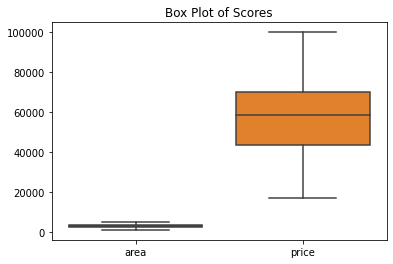

In [ ]:
sns.boxplot(data=df).set(title="Box Plot of Scores")  # detect outliers

In [ ]:
# if you have multiple features
# reg.fit(df.drop('price',axis='columns'),df.price)